# Daily Climate Forecasting

**Daily climate data in the city of Delhi from 2013 to 2017**

https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data

**Content**

The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are
meantemp, humidity, wind_speed, meanpressure.

**Acknowledgements**

This dataset has been collected from Weather Undergroud API. Dataset ownership and credit goes to them.

**Submission Deadline**

Assignment 4 must be submitted by October 19, 2019 (10:00 PM). Any kernel published after this deadline will be evaluated for only 50% of the total marks.

**Inspiration**

This dataset was developed as a part Assignment 4 of Data Analytics Course, 2019 at PES University, Bangalore

# Dataset Overview

**date** Date of format YYYY-MM-DD

**meantemp** Mean temperature averaged out from multiple 3 hour intervals in a day.

**humidity** Humidity value for the day (units are grams of water vapor per cubic meter volume of air)

**wind_speed** Wind speed measured in kmph

**meanpresure** Pressure reading of weather (measure in atm)

# Libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import datetime

# Data Analysis & Visualization

In [2]:
train_data = pd.read_csv('DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('DailyDelhiClimateTest.csv')

In [3]:
# convert datetime object
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [4]:
train_data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [5]:
test_data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


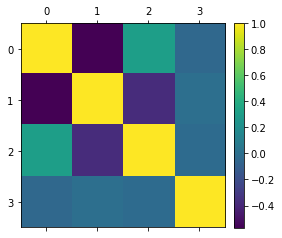

In [6]:
# Matrix Correlation
im = plt.matshow(train_data.corr())
plt.colorbar(im,fraction=0.046, pad=0.04)

In [7]:
def Visualize(kind='hist',figsize=(10,10)):
    def Col():
        cols = ['meantemp','humidity','wind_speed','meanpressure']
        for c in cols:
            yield c

    fig,axes = plt.subplots(nrows=2,ncols=2,figsize=figsize)
    col = Col()
    for i in range(2):
        for j in range(2):
            curr = next(col)
            if kind == 'hist':
                axes[i,j].hist(train_data[curr])
            elif kind == 'plot':
                axes[i,j].plot(train_data['date'],train_data[curr])
                plt.gcf().autofmt_xdate()
            axes[i,j].set_title(curr)

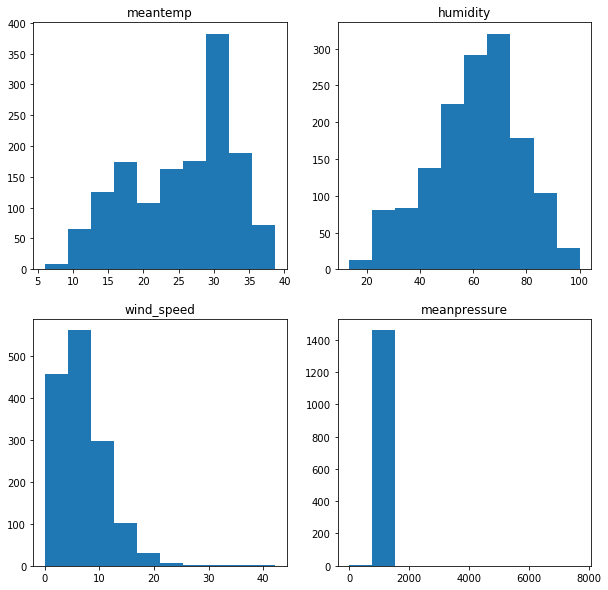

In [8]:
Visualize('hist')

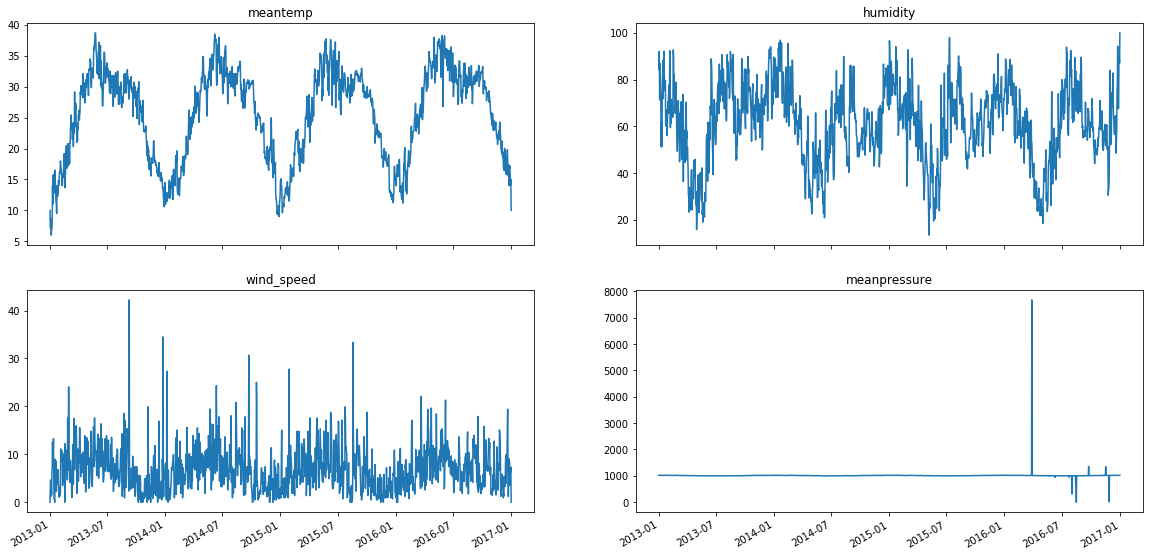

In [9]:
Visualize('plot',(20,10))

# Data Preprocessing

In [158]:
def process_data(data):
    x,y = [],[]
    switch = False
    
    if len(data)%2 == 1:
        last = False
    else:
        last = True
    
    for i in range(len(data)):
        if i == len(data)-1:
            if not last:
                break
        if switch:
            y.append(data[i])
            switch = False
        else:
            x.append(data[i])
            switch = True
    
    def reshape(d):
        d = np.array(d)
        d = np.reshape(d,(d.shape[0],1,1))
        return d
    return (reshape(x),np.array(y))

In [161]:
x_train_meantemp,y_train_meantemp = process_data(train_data.meantemp)
x_test_meantemp,y_test_meantemp = process_data(test_data.meantemp)

In [164]:
x_train_humidity,y_train_humidity = process_data(train_data.humidity)
x_test_humidity,y_test_humidity = process_data(test_data.humidity)

In [165]:
x_train_wind_speed,y_train_wind_speed = process_data(train_data.wind_speed)
x_test_wind_speed,y_test_wind_speed = process_data(test_data.wind_speed)

In [166]:
x_train_meanpressure,y_train_meanpressure = process_data(train_data.meanpressure)
x_test_meanpressure,y_test_meanpressure = process_data(test_data.meanpressure)

# Neural Network Model

In [ ]:
model_meantemp = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model_humidity = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model_wind_speed = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [222]:
model_meanpressure = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model_meantemp.compile(loss='mse',optimizer='adam')

In [ ]:
model_humidity.compile(loss='mse',optimizer='adam')

In [ ]:
model_wind_speed.compile(loss='mse',optimizer='adam')

In [223]:
model_meanpressure.compile(loss='mse',optimizer='adam')

In [200]:
model_meantemp.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 8)                 320       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


# Create Callback & EarlyStopping

In [170]:
os.makedirs('logs',exist_ok=True)
logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [171]:
callback = keras.callbacks.TensorBoard(logdir)
earlyStoping = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

# Training Model

In [225]:
history_humidity = model_humidity.fit(x_train_humidity,y_train_humidity,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Train on 731 samples
Epoch 1/100
731/731 - 2s - loss: 3936.3549
Epoch 2/100
731/731 - 0s - loss: 3759.4168
Epoch 3/100
731/731 - 0s - loss: 3152.8522
Epoch 4/100
731/731 - 0s - loss: 1853.7112
Epoch 5/100
731/731 - 0s - loss: 624.3334
Epoch 6/100
731/731 - 0s - loss: 233.1596
Epoch 7/100
731/731 - 0s - loss: 170.6208
Epoch 8/100
731/731 - 0s - loss: 122.9756
Epoch 9/100
731/731 - 0s - loss: 98.6130
Epoch 10/100
731/731 - 0s - loss: 84.6534
Epoch 11/100
731/731 - 0s - loss: 77.8936
Epoch 12/100
731/731 - 0s - loss: 68.2534
Epoch 13/100
731/731 - 0s - loss: 65.4882
Epoch 14/100
731/731 - 0s - loss: 67.6884
Epoch 15/100
731/731 - 0s - loss: 64.5799
Epoch 16/100
731/731 - 0s - loss: 65.2771
Epoch 17/100
731/731 - 0s - loss: 64.4925
Epoch 18/100
731/731 - 0s - loss: 63.5067
Epoch 19/100
731/731 - 0s - loss: 62.1702
Epoch 20/100
731/731 - 0s - loss: 64.4238
Epoch 21/100
731/731 - 0s - loss: 64.6847
Epoch 22/100
731/731 - 0s - loss: 63.1968


In [226]:
history_meantemp = model_meantemp.fit(x_train_meantemp,y_train_meantemp,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Train on 731 samples
Epoch 1/100
731/731 - 2s - loss: 691.8395
Epoch 2/100
731/731 - 0s - loss: 636.8350
Epoch 3/100
731/731 - 0s - loss: 490.7397
Epoch 4/100
731/731 - 0s - loss: 204.6697
Epoch 5/100
731/731 - 0s - loss: 44.5365
Epoch 6/100
731/731 - 0s - loss: 31.0669
Epoch 7/100
731/731 - 0s - loss: 18.2431
Epoch 8/100
731/731 - 0s - loss: 8.5391
Epoch 9/100
731/731 - 0s - loss: 4.9868
Epoch 10/100
731/731 - 0s - loss: 4.2715
Epoch 11/100
731/731 - 0s - loss: 3.8901
Epoch 12/100
731/731 - 0s - loss: 3.4697
Epoch 13/100
731/731 - 0s - loss: 3.3069
Epoch 14/100
731/731 - 0s - loss: 3.0838
Epoch 15/100
731/731 - 0s - loss: 3.0165
Epoch 16/100
731/731 - 0s - loss: 3.0108
Epoch 17/100
731/731 - 0s - loss: 2.8623
Epoch 18/100
731/731 - 0s - loss: 2.7931
Epoch 19/100
731/731 - 0s - loss: 2.8059
Epoch 20/100
731/731 - 0s - loss: 2.8133
Epoch 21/100
731/731 - 0s - loss: 2.7727
Epoch 22/100
731/731 - 0s - loss: 2.7414
Epoch 23/100
731/731 - 0s - loss: 2.9941
Epoch 24/100
731/731 - 0s - loss: 

In [227]:
history_wind_speed = model_wind_speed.fit(x_train_wind_speed,y_train_wind_speed,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Train on 731 samples
Epoch 1/100
731/731 - 3s - loss: 64.5435
Epoch 2/100
731/731 - 0s - loss: 53.4858
Epoch 3/100
731/731 - 0s - loss: 33.8372
Epoch 4/100
731/731 - 0s - loss: 19.1990
Epoch 5/100
731/731 - 0s - loss: 17.4674
Epoch 6/100
731/731 - 0s - loss: 17.1135
Epoch 7/100
731/731 - 0s - loss: 16.8332
Epoch 8/100
731/731 - 0s - loss: 16.6421
Epoch 9/100
731/731 - 0s - loss: 16.4722
Epoch 10/100
731/731 - 0s - loss: 16.3534
Epoch 11/100
731/731 - 0s - loss: 16.2716
Epoch 12/100
731/731 - 0s - loss: 16.3019
Epoch 13/100
731/731 - 0s - loss: 16.2039
Epoch 14/100
731/731 - 0s - loss: 16.1408
Epoch 15/100
731/731 - 0s - loss: 16.1767
Epoch 16/100
731/731 - 0s - loss: 16.1789
Epoch 17/100
731/731 - 0s - loss: 16.1148
Epoch 18/100
731/731 - 0s - loss: 16.1125
Epoch 19/100
731/731 - 0s - loss: 16.1329
Epoch 20/100
731/731 - 0s - loss: 16.1209
Epoch 21/100
731/731 - 0s - loss: 16.1040
Epoch 22/100
731/731 - 0s - loss: 16.0812
Epoch 23/100
731/731 - 0s - loss: 16.1174
Epoch 24/100
731/731 -

In [224]:
history_meanpressure = model_meanpressure.fit(x_train_meanpressure,y_train_meanpressure,epochs=100,verbose=2,batch_size=16,callbacks=[callback,earlyStoping])

Train on 731 samples
Epoch 1/100
731/731 - 2s - loss: 1010512.2487
Epoch 2/100
731/731 - 0s - loss: 1007988.6249
Epoch 3/100
731/731 - 0s - loss: 1003112.0728
Epoch 4/100
731/731 - 0s - loss: 993838.6837
Epoch 5/100
731/731 - 0s - loss: 977968.5393
Epoch 6/100
731/731 - 0s - loss: 953071.3476
Epoch 7/100
731/731 - 0s - loss: 917451.4500
Epoch 8/100
731/731 - 0s - loss: 870166.8062
Epoch 9/100
731/731 - 0s - loss: 810957.8792
Epoch 10/100
731/731 - 0s - loss: 740512.7308
Epoch 11/100
731/731 - 0s - loss: 660472.4039
Epoch 12/100
731/731 - 0s - loss: 573115.0435
Epoch 13/100
731/731 - 0s - loss: 479483.4611
Epoch 14/100
731/731 - 0s - loss: 385169.2227
Epoch 15/100
731/731 - 0s - loss: 295817.1212
Epoch 16/100
731/731 - 0s - loss: 216071.8202
Epoch 17/100
731/731 - 0s - loss: 149343.4307
Epoch 18/100
731/731 - 0s - loss: 97345.8980
Epoch 19/100
731/731 - 0s - loss: 59766.3810
Epoch 20/100
731/731 - 0s - loss: 34898.7039
Epoch 21/100
731/731 - 0s - loss: 19769.4094
Epoch 22/100
731/731 - 

In [228]:
def Gen_hist():
    all_hist = ['history_humidity','history_meanpressure','history_meantemp','history_wind_speed']
    for hist in all_hist:
        yield hist

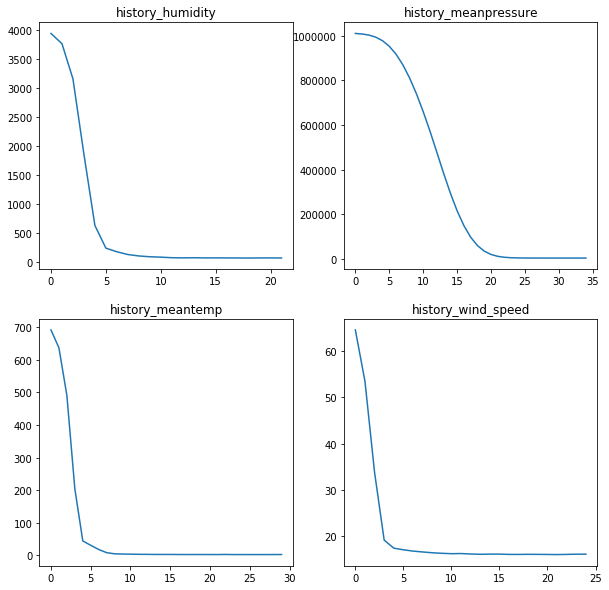

In [229]:
gen_hist = Gen_hist()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
for i in range(2):
    for j in range(2):
        hist_now = next(gen_hist)
        axes[i,j].plot(eval(hist_now).history['loss'])
        axes[i,j].set_title(hist_now)

# Prediction

In [230]:
def Gen_test():
    all_test = ['x_test_wind_speed','x_test_humidity','x_test_meantemp','x_test_meanpressure']
    all_y = ['y_test_wind_speed','y_test_humidity','y_test_meantemp','y_test_meanpressure']
    all_model = ['model_wind_speed','model_humidity','model_meantemp','model_meanpressure']
    for test in zip(all_test,all_y,all_model):
        yield test

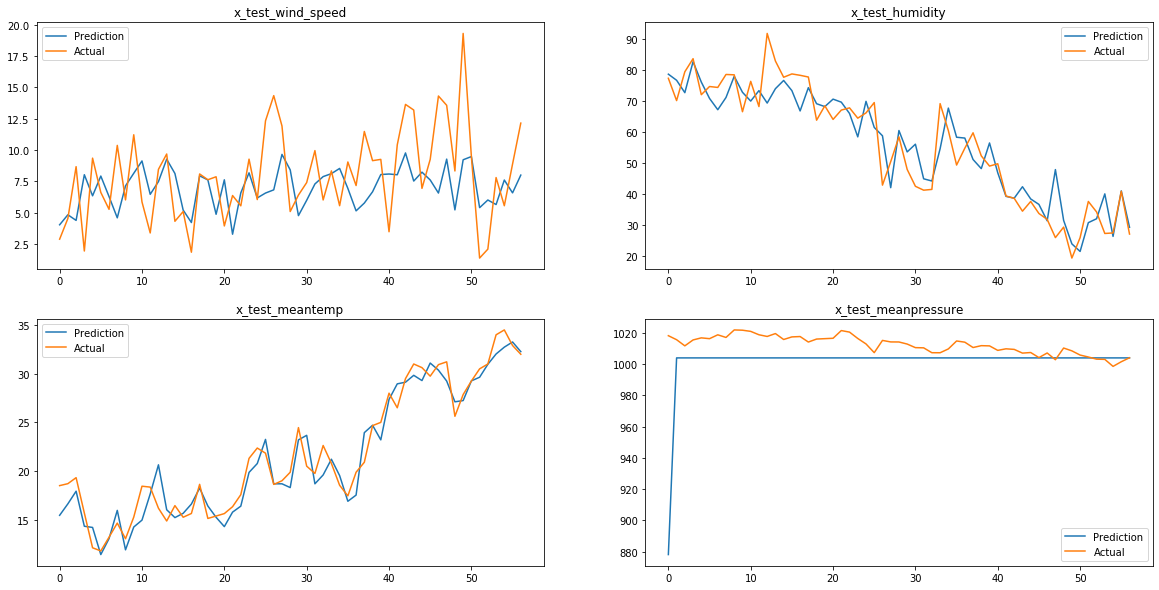

In [234]:
gen_test = Gen_test()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(20,10))
for i in range(2):
    for j in range(2):
        test_now = next(gen_test)
        axes[i,j].plot(eval(test_now[2]).predict(eval(test_now[0])),label='Prediction')
        axes[i,j].plot(eval(test_now[1]),label='Actual')
        axes[i,j].set_title(test_now[0])
        axes[i,j].legend()

# Save Model

In [235]:
os.makedirs('models',exist_ok=True)

In [236]:
all_model = ['model_wind_speed','model_humidity','model_meantemp','model_meanpressure']
for model in all_model:
    eval(model).save(f'models/{model}.h5')